In [18]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt

import yfinance as yf #manual fix found on website linked below ******* need to update pandas datareader too before below fix
yf.pdr_override() #https://stackoverflow.com/questions/74832296/typeerror-string-indices-must-be-integers-when-getting-data-of-a-stock-from-y

In [19]:
start = dt.date(2010,5,1)
end = dt.datetime.now()
stocks=['AAPL','MSFT','^GSPC']

In [20]:
df = reader.get_data_yahoo(stocks,start,end)["Adj Close"]

[*********************100%***********************]  3 of 3 completed


In [21]:
df.head(10)

,AAPL,MSFT,^GSPC
Date,,,
2010-05-03,8.074179,23.613731,1202.260010
2010-05-04,7.841668,23.055143,1173.599976
2010-05-05,7.760123,22.840897,1165.869995
2010-05-06,7.464861,22.175175,1128.150024
2010-05-07,7.149899,21.585976,1110.880005
2010-05-10,7.699491,22.144573,1159.729980
2010-05-11,7.776188,22.098652,1155.790039
2010-05-12,7.945037,22.527161,1171.670044
2010-05-13,7.831968,22.374130,1157.439941


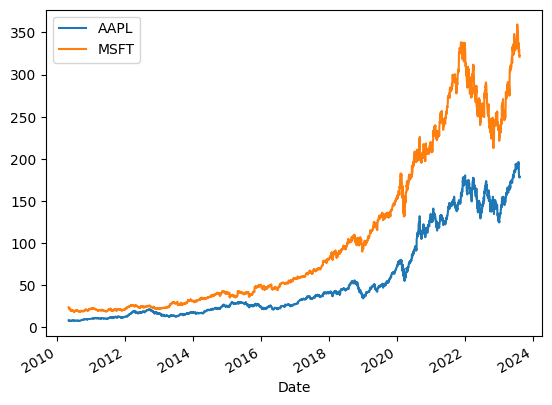

In [22]:
df.iloc[:,:2].plot()
plt.show()

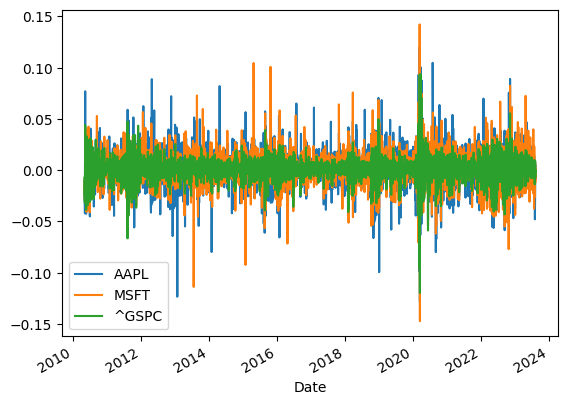

In [23]:
daily_returns= df.pct_change()
daily_returns.plot()
plt.show()

In [24]:
daily_cum_returns = (daily_returns+1).cumprod() #daily cummulative stock returns

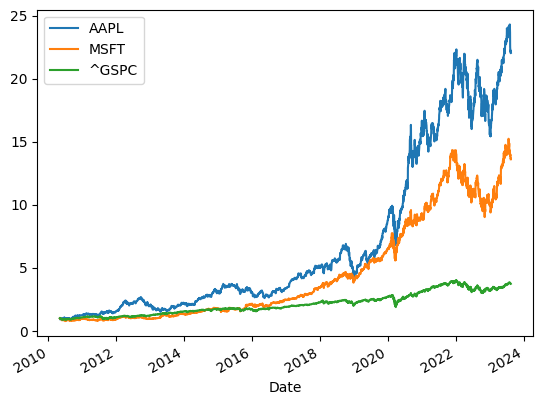

In [25]:
daily_cum_returns.plot()
plt.show()

## Stock BETA
calculating stock beta base on capital asset pricing model CAPM 

In [26]:
import statsmodels.api as sm

In [27]:
mtl_returns = df.resample('M').ffill().pct_change()
mtl_returns = mtl_returns.dropna(axis=0)  #value is dropped along row so axis is 0

In [28]:
mtl_returns.head()

,AAPL,MSFT,^GSPC
Date,,,
2010-06-30,-0.020827,-0.108140,-0.053882
2010-07-31,0.022741,0.121686,0.068778
2010-08-31,-0.055005,-0.085812,-0.047449
2010-09-30,0.167215,0.043459,0.087551
2010-10-31,0.060723,0.089016,0.036856


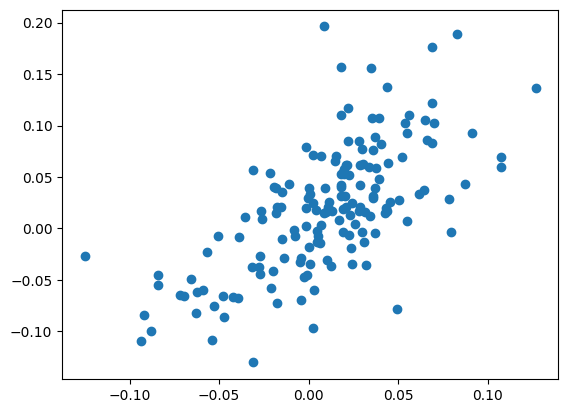

In [29]:
X=mtl_returns['^GSPC']
y=mtl_returns['MSFT']
plt.scatter(X,y)  #visualise the relationship
plt.show()

In [30]:
#in stats models the intercept is not added and hence should be manually added
X_sm = sm.add_constant(X)

In [31]:
model = sm.OLS(y,X_sm)
results = model.fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           3.10e-21
Time:                        10:53:44   Log-Likelihood:                 262.53
No. Observations:                 159   AIC:                            -521.1
Df Residuals:                     157   BIC:                            -514.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.004      2.637      0.009       0.003       0.018
^GSPC          0.9698      0.088     11.004      0.000       0.796       1.144
==============================================================================
Omnibus:                        9.252   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.943
Skew:                           0.371   Prob(JB):                      0.00255
Kurtosis:                       4.119   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import seaborn as sns

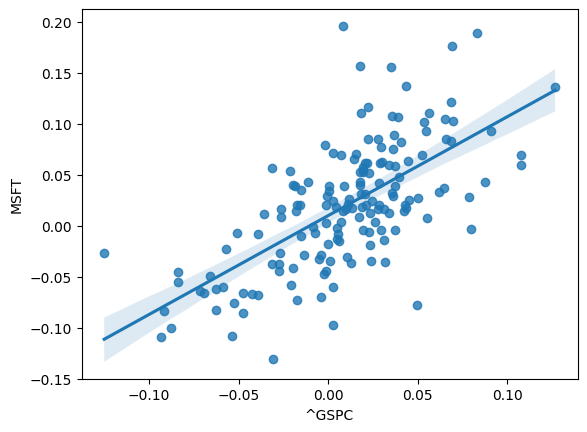

In [34]:
sns.regplot(x='^GSPC',y='MSFT',data=mtl_returns) #regression plot helps visualise the results 
plt.show()